In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [66]:
from datasets.nuscenes_ood import *
from tools.utils import *

%matplotlib inline
import matplotlib.pyplot as plt

from time import time

In [68]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
val_data = NuScenesDatasetOOD(nusc, False)

In [69]:
t_0 = time()
images, intrinsics, extrinsics, labels, oods, cam_oods = val_data[40]
time() - t_0

tensor([[ 5.6848e-03, -5.6367e-03,  9.9997e-01, -1.5205e+00],
        [-9.9998e-01, -8.3712e-04,  5.6801e-03,  1.6922e+00],
        [ 8.0507e-04, -9.9998e-01, -5.6413e-03,  2.3100e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])
107520.0


  0%|          | 0/50 [00:00<?, ?it/s]

7.083027124404907

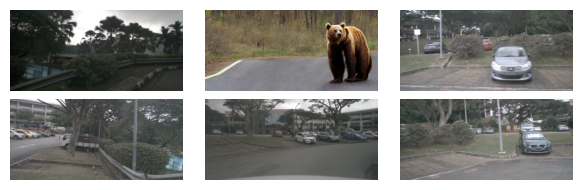

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0).numpy())
    
plt.tight_layout()

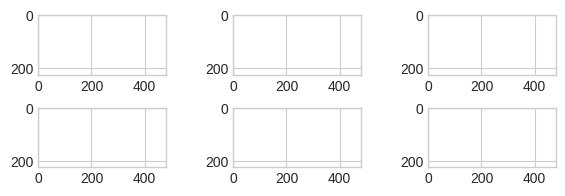

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(cam_oods[i] )

plt.tight_layout()

/tmp/ipykernel_2743210/2233875358.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  l_image = map_rgb(torch.tensor(labels), ego=True) / 255


(-0.5, 199.5, 199.5, -0.5)

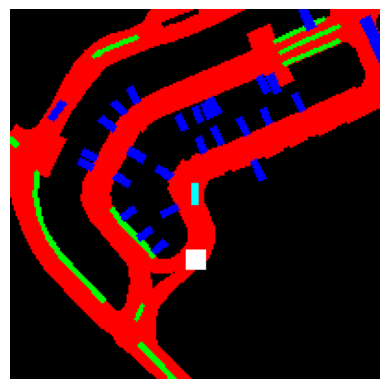

In [21]:
l_image = map_rgb(torch.tensor(labels), ego=True) / 255
l_image[oods == 1, :] = 1
plt.imshow(l_image)
plt.axis("off")